In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
Pov_data = pd.read_csv("Poverty_LifeExp.csv")
Pov_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [25]:
my_mpi_ds = pd.read_csv("MPI_Dataset.csv")
my_mpi_ds.head()

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,KAZ,Kazakhstan,0.000,0.0,33.3,0.000,0.09,33.3
1,SRB,Serbia,0.000,0.1,41.4,0.002,0.50,40.3
2,KGZ,Kyrgyzstan,0.000,0.1,40.2,0.003,0.70,37.1
3,TUN,Tunisia,0.000,0.1,35.6,0.012,3.18,38.7
4,ARM,Armenia,0.001,0.2,33.3,0.001,0.39,36.9


In [26]:
my_mpi_ds = my_mpi_ds.drop(['ISO','Headcount Ratio Urban','Intensity of Deprivation Urban',
                            'Headcount Ratio Rural','Intensity of Deprivation Rural'], axis=1)

my_mpi_ds.rename(columns={'Country':'country', 'MPI Urban':'mpi_urban', 'MPI Rural':'mpi_rural'}, inplace=True)

my_mpi_ds.head(3)

combined = pd.merge(
    Pov_data,
    my_mpi_ds,
    on='country',
    how='inner'
)

combined.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,mpi_urban,mpi_rural
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.132,0.347
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.003,0.007
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.003,0.011
3,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0.001,0.001
4,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,0.009,0.035


In [27]:
reg = linear_model.LinearRegression()

import statsmodels.api as sm
from statsmodels.formula.api import ols

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     163.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           9.91e-21
Time:                        20:30:04   Log-Likelihood:                 127.06
No. Observations:                  79   AIC:                            -250.1
Df Residuals:                      77   BIC:                            -245.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0230      0.010     -2.388      0.0

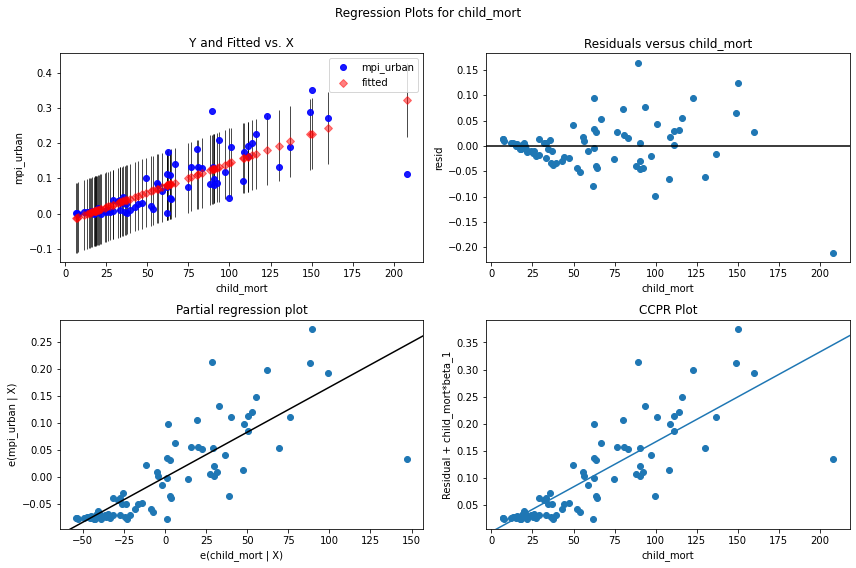

In [28]:
model = ols('mpi_urban ~ child_mort', data=combined).fit()

print(model.summary())

fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(model,'child_mort',fig=fig)

In [29]:
reg.fit(combined[['child_mort','exports','health','imports','income',
                  'inflation','life_expec','total_fer','gdpp']],combined.mpi_urban)

LinearRegression()

In [30]:
reg.score(combined[['child_mort','exports','health','imports','income'
                    ,'inflation','life_expec','total_fer','gdpp']],combined.mpi_urban)

0.8348816614462782

In [31]:
1- (1-reg.score(combined[['child_mort','exports','health','imports','income',
                          'inflation','life_expec','total_fer','gdpp']],combined.mpi_urban))*(len(combined.mpi_urban)-1)/(len(combined.mpi_urban)-combined[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']].shape[1]-1)

0.8133444868523144

In [32]:
Model1 = ols('mpi_urban ~ child_mort+exports+health+imports+income+inflation+life_expec+total_fer+gdpp',
             data=combined).fit()
print(Model1.summary())

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     38.76
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           1.45e-23
Time:                        20:30:22   Log-Likelihood:                 153.21
No. Observations:                  79   AIC:                            -286.4
Df Residuals:                      69   BIC:                            -262.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2707      0.082     -3.300      0.0

In [33]:
#TO DO 1
#从lab4 TO DO 2的热力图中可以看出，child_mort total_fer income total_fer和mpi_urban比率之间的相关性较高，为0.82和0.85，
#即存在很强的多重共线性
#在进行分析时可以考虑剔除这两个变量，以免导致因多重共线性（multicollinearity and heteroscedasticity）造成的过拟合
model2 = ols('mpi_urban ~ exports+health+imports+inflation+gdpp',data=combined).fit()

print(model2.summary())
#R^2 = 0.381 Ajd R-squared = 0.338

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     8.981
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           1.10e-06
Time:                        20:30:39   Log-Likelihood:                 101.01
No. Observations:                  79   AIC:                            -190.0
Df Residuals:                      73   BIC:                            -175.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1184      0.032      3.735      0.0

In [34]:
#TO DO 2
#因为
model3 = ols('mpi_urban ~ child_mort+income+life_expec+total_fer',data=combined).fit()

print(model3.summary())
#R^2 = 0.809 Ajd R-squared = 0.798

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     78.19
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           8.25e-26
Time:                        20:30:51   Log-Likelihood:                 147.39
No. Observations:                  79   AIC:                            -284.8
Df Residuals:                      74   BIC:                            -272.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2219      0.077     -2.869      0.0

In [ ]:
#TO DO 3
#the model 1 will be more suitable for predicting the mpi_urban, 
#because the model 3 has already ignore all the low features and effect the result and the model 2 has remove all the 
#high features with multicollinearity and heteroscedasticity it will also affect the result because of the lower R-squared and adj R-squared
# the model 1 it has the highest R-squared and adj R-squared than model 3